In [1]:
### 

In [ ]:
from sklearn.datasets import fetch_mldata

In [4]:
mnist=fetch_mldata('MNIST original') ## datasets of images of digits handwritten by highschool students

In [10]:
mnist


{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [11]:
X,y=mnist["data"],mnist["target"]

In [12]:
X.shape

(70000, 784)

In [13]:
y.shape

(70000,)

In [96]:
import matplotlib
import matplotlib.pyplot as plt
some_digit=X[36000] # entire row if its single index
some_digit_image=some_digit.reshape(28,28)

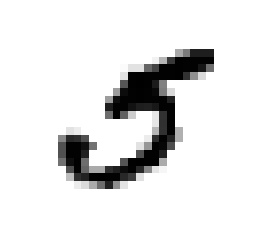

In [102]:
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation='nearest')
plt.axis('off')
plt.show()


In [116]:
X.shape

(70000, 784)

In [118]:
y.shape

(70000,)

In [148]:
######## Diving the MNIST dataset into training and test datasets ######
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:] ### Colon is equivalent to 
###### Shuffling the dataset to ensure there are no similar instances; some learning algorithms are sensitive to it##
shuffle_index=np.random.permutation(60000)
X_train,y_train=X_train[shuffle_index],y_train[shuffle_index]

In [149]:
######  Distinguish between two classes: 5 and not-5##
y_train_5=(y_train==5)
y_test_5=(y_test==5)


In [150]:
X_train.shape

(60000, 784)

In [151]:
######  Train the instances using SGD (Stochastic Gradient Descent)classifier##
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

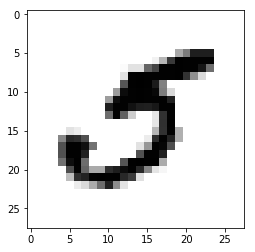

In [152]:
some_digit.reshape(28,28)
plt.imshow(some_digit.reshape(28,28),cmap=matplotlib.cm.binary)
plt.show()

In [153]:
######  Now the fitted classifer is used to detect images 
sgd_clf.predict([some_digit])


array([ True], dtype=bool)

In [154]:
sgd_clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [155]:
####### Evaluating Classifier: Performance measurure ######
####### Evaluting classifier using K-fold cross validation; splitting the training set into K-folds
####### Performance Measure: (1) Accuracy

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train,y_train_5,cv=3,scoring='accuracy') ## y_train_5=groups


array([ 0.86922615,  0.87544377,  0.86042906])

In [159]:
####### Now lets look the performance of "Not-5 class"
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1), dtype=bool)
     
  

In [160]:
never_5_csf=Never5Classifier()
cross_val_score(never_5_csf,X_train,y_train_5,cv=3,scoring='accuracy')

array([ 0.90625,  0.9116 ,  0.9111 ])

In [ ]:
####### Evaluating Classifier: Performance measurure: Confusion matrix ######



In [91]:
import numpy as np
###aa=np.random.random((10,10)); ## Random number generator: SINGLE INDEX: entire row; DOUBLE INDEX; row IDxcolumn ID

In [52]:
#### Function to create a matrix of zeros/ones with dimensions (mxn)
def create_matrix(m, n):
    return [[1]*n for _ in xrange(m)]
a = create_matrix(8, 8)

In [114]:
a=range(0,100,1)

In [193]:
a=float(len(y_train[y_train==5])./len(y_train[y_train>=0]))


SyntaxError: invalid syntax (<ipython-input-193-8cf416591852>, line 1)

In [195]:
len(y_train[y_train>=0])

60000